# Udacity Data Analysis Project: TMDB Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


**Overview**

To complete my Data Analysis project I am using TMDb movies dataset.

This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.

**Question that can analyised from this data set**

1. Genres with the most favourable ratings.
2. Actors with the most appearance in movies
3. Correlation between Movie Budget and Popularity
4. Top 10 Movies by Profit


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

This is the part where we load our dataset, check it out and make sure it's clean ready for analysis. After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable. .

### General Properties

#### Reading The Data

In [3]:
df = pd.read_csv('tmdb-movies.csv', sep=',')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Data Shape and Dimensions

The Dataset consist of 10,866 Rows and Columns

In [4]:
df.shape

(10866, 21)

#### Data Columns

Let's check for names of the columns present in the dataset and their properties

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

In this process, the data are understood, cleaned, and transformed into a format that allows for analysis.
This is done by
- Checking for duplicate rows
- Checking for null values
- Removing non essential columns
- formatting data to the right type

In [6]:
#Checking for duplicates

df.duplicated().sum()

1

In [7]:
#Checking for null values

df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
#dropping Duplicate rows

df.drop_duplicates(inplace=True)

**Columns to be dropped and reasons**
1. The 'imdb_id' has some null values and since we're using the 'id' column as the unique identifier, we have no need for it.
2. The 'homepage' has a lot of missing values, is peculiar to each movie and therefore does not offer any significant info to help in our analysis.
3. The same argument as above could be applied 'tagline', 'keywords', and 'overview'.

In [9]:
#dropping non essential columns

df.drop(['imdb_id', 'homepage', 'tagline', 'overview', 'keywords'], axis=1, inplace=True)

In [10]:
#parsing date time in 'release_date' column

df['release_date'] = pd.to_datetime(df['release_date'])
type(df.release_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
#dropping movies without casts, directors, production_companies and genres

df = df[df['cast'].isnull() == False]
df = df[df['director'].isnull() == False]
df = df[df['production_companies'].isnull() == False]
df = df[df['genres'].isnull() == False]

In [12]:
#checking data info again to view changes made

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9772 non-null   int64         
 1   popularity            9772 non-null   float64       
 2   budget                9772 non-null   int64         
 3   revenue               9772 non-null   int64         
 4   original_title        9772 non-null   object        
 5   cast                  9772 non-null   object        
 6   director              9772 non-null   object        
 7   runtime               9772 non-null   int64         
 8   genres                9772 non-null   object        
 9   production_companies  9772 non-null   object        
 10  release_date          9772 non-null   datetime64[ns]
 11  vote_count            9772 non-null   int64         
 12  vote_average          9772 non-null   float64       
 13  release_year     

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 Genres with the most favourable ratings.

Before we start, it will be advisible to write the current updated dataset to a csv file

In [13]:
df.to_csv('movie_data.csv', index=False)

In [14]:
df = pd.read_csv('movie_data.csv')
df['release_date'] = pd.to_datetime(df['release_date'])

In [15]:
#investigating the genre column

df['genres']

0       Action|Adventure|Science Fiction|Thriller
1       Action|Adventure|Science Fiction|Thriller
2              Adventure|Science Fiction|Thriller
3        Action|Adventure|Science Fiction|Fantasy
4                           Action|Crime|Thriller
                          ...                    
9767                                  Documentary
9768                       Action|Adventure|Drama
9769                               Mystery|Comedy
9770                                Action|Comedy
9771                                       Horror
Name: genres, Length: 9772, dtype: object

As we can see the genre column contain several values split by (|), so we need to find a way to parse those

In [16]:
#create a copy of genre
df_genre_copy = df.copy()

In [ ]:
#splitting the genre column and converting to an array
df_genre_copy['genres'] = df_genre_copy.genres.str.split('|')

In [ ]:
#verifying array creation
df_genre_copy.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [ ]:
#using the explode function to get each genre on a diffrent row

df_genre_exploded = df_genre_copy.explode('genres')
df_genre_exploded.head(10)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Adventure,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Science Fiction,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Science Fiction,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [ ]:
#New Dataframe with 'popularity', 'genres' and 'release_year'
df_genre = df_genre_exploded[['popularity', 'genres', 'release_year']]
df_genre.head(10)

,popularity,genres,release_year
0,32.985763,Action,2015
0,32.985763,Adventure,2015
0,32.985763,Science Fiction,2015
0,32.985763,Thriller,2015
1,28.419936,Action,2015
1,28.419936,Adventure,2015
1,28.419936,Science Fiction,2015
1,28.419936,Thriller,2015
2,13.112507,Adventure,2015
2,13.112507,Science Fiction,2015


In [ ]:
#group by genre and popularity

df_genre_grouped  = df_genre_exploded.groupby(['release_year', 'genres']).popularity.mean()
genre_yearwise = df_genre_grouped.to_frame().groupby(level = 'release_year').popularity.nlargest(1).to_frame()

In [ ]:
genre_yearwise.reset_index(level=2,inplace=True)

In [ ]:
genre_yearwise.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 56 entries, (1960, 1960) to (2015, 2015)
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   genres      56 non-null     object 
 1   popularity  56 non-null     float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [ ]:
genre_yearwise.head()

,,genres,popularity
release_year,release_year,,
1960,1960,Thriller,0.811910
1961,1961,Animation,2.631987
1962,1962,Adventure,0.942513
1963,1963,Animation,2.180410
1964,1964,War,0.930959


In [ ]:
genre = genre_yearwise.genres.value_counts()
genre

Animation          13
Adventure          11
Fantasy             8
Crime               5
War                 4
Science Fiction     4
Family              3
Music               2
Mystery             2
Thriller            1
Action              1
History             1
Western             1
Name: genres, dtype: int64

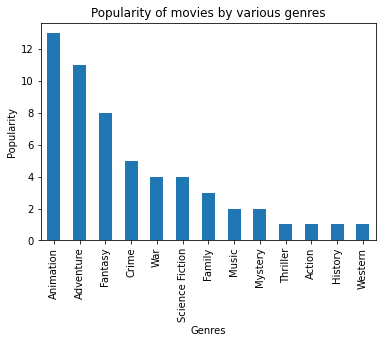

In [ ]:
#plotting popularity by genres

genre.plot.bar(title="Popularity of movies by various genres",xlabel="Genres",ylabel="Popularity");


**As evident in the bar plot above, the 'Animation' genre takes the lead with 'Adventure' and 'Fantasy' following behind respectively.**

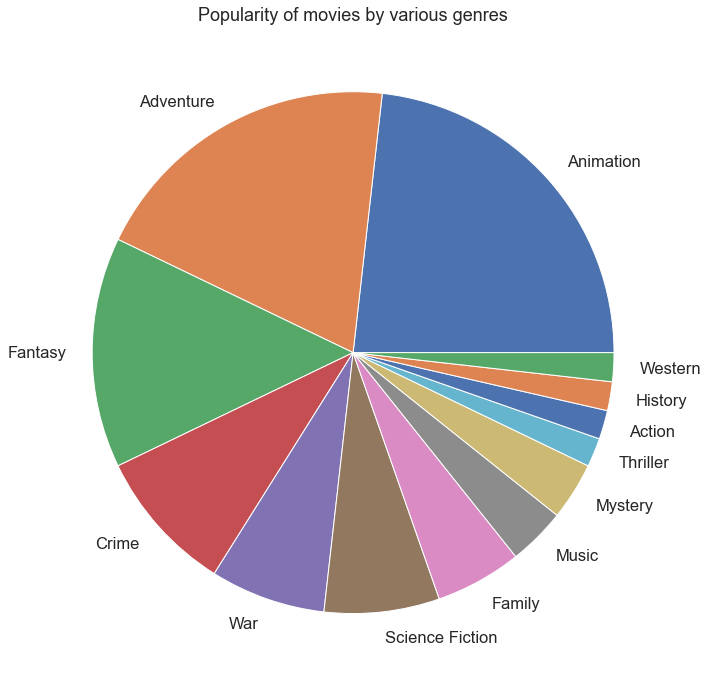

In [ ]:
#genre.plot(kind='pie', figsize=(8,8), title="Popularity of movies by various genres" )

genre.plot.pie(title="Popularity of movies by various genres", ylabel='');

**According to the plot above, we can see that Animation is the most popular genre, followed by Adventure and Fantasy**


### Research Question 2  Actors with the most appearance in movies

We have a column for cast with which we can use to find out the actor with the most appearance in all the movies in the dataset

In [ ]:
#create a dict for the cast and number of occurances
actor_dict = {}

actors = df['cast']
#As we saw previously, there are multiple values in the cast columns sepereated by the pipe(|) character

actors = actors.str.split('|')
actors = np.array(actors)

for actorList in actors:
    for actor in actorList:
        actor = actor.strip() #trim the whitespaces
        if actor not in actor_dict:
            actor_dict[actor] = 1
        else:
            actor_dict[actor] += 1


In [ ]:
import operator
sorted_actor_dict = sorted(actor_dict.items(), key = operator.itemgetter(1), reverse = True)

c:\ProgramData\Anaconda3\envs\my_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


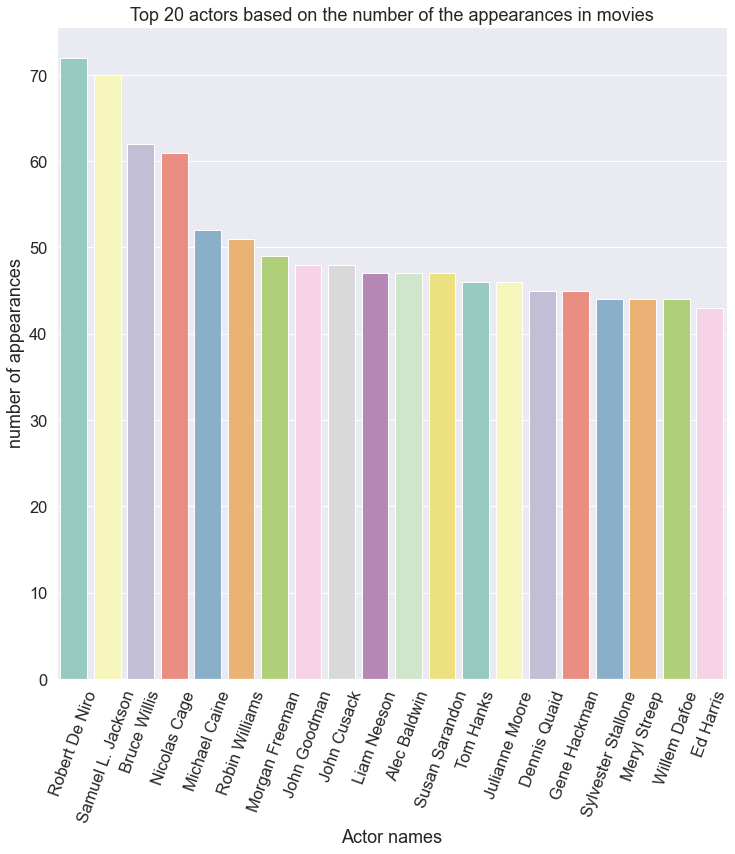

In [ ]:
x_axis = list()
y_axis = list()

for item in sorted_actor_dict[0:20]:
    x_axis.append(item[0])
    y_axis.append(item[1])


sns.set(rc={'figure.figsize':(12,12)}, font_scale=1.5)
ax = sns.barplot(x_axis, y_axis, palette="Set3")


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(70)
    

ax.set(xlabel='Actor names', ylabel='number of appearances', title = 'Top 20 actors based on the number of the appearances in movies')
plt.show();

**From the above Visuals, we can easily see that Robert De Niro is the top actor followed by Samuel L. Jackson**

### Research Question 3  Correlation between Movie Budget and Popularity

**We're going to investigate if the movies with a higher budget are more popular than those with less budget**

In [18]:
df_new = df[df['budget_adj'] != 0].copy()
print(df['budget_adj'].describe())
df_new['budget_adj'].describe()

count    9.772000e+03
mean     1.941599e+07
std      3.566634e+07
min      0.000000e+00
25%      0.000000e+00
50%      3.061342e+05
75%      2.464268e+07
max      4.250000e+08
Name: budget_adj, dtype: float64


count    5.021000e+03
mean     3.778790e+07
std      4.220942e+07
min      9.210911e-01
25%      8.890145e+06
50%      2.374361e+07
75%      5.082002e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [21]:
df[df['budget_adj'] == 0].budget_adj.value_counts()

0.0    4751
Name: budget_adj, dtype: int64

I filtered the 'zero' values out and found out that there were 4,751 of them

In [78]:
## find quartile,max and min values
min_value = df_new['budget_adj'].min()
first_quantile = df_new['budget_adj'].describe()[4]
second_quantile = df_new['budget_adj'].describe()[5]
third_quantile = df_new['budget_adj'].describe()[6]
max_value = df_new['budget_adj'].max()
## bin edges that will be used to cut data in groups
bin_edges = [min_value,first_quantile,second_quantile,third_quantile,max_value]
## labels for the four budget level groups
bin_names = ['Low','Medium','Moderately High','High']
## Create budget levels column
name = '{}_levels'.format('budget_adj')
df_new['budget_adj_levels'] = pd.cut(df_new['budget_adj'],bin_edges,labels=bin_names,include_lowest=True)

df_new['budget_adj_levels']

0                  High
1                  High
2                  High
3                  High
4                  High
             ...       
9743               High
9749                Low
9755    Moderately High
9761                Low
9771                Low
Name: budget_adj_levels, Length: 5021, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'Moderately High' < 'High']

In [79]:
df_budget_filtered_data = df_new[df_new['release_year'].isin([2010,2011,2012,2013,2014,2015])]
    
df_popularity_on_budget = df_budget_filtered_data.groupby(['release_year','budget_adj_levels']).popularity.mean().to_frame().reset_index()

In [80]:
short_movie_vote = df_popularity_on_budget[df_popularity_on_budget['budget_adj_levels'] == 'Low'].popularity.tolist()
medium_movie_vote = df_popularity_on_budget[df_popularity_on_budget['budget_adj_levels'] == 'Medium'].popularity.tolist()
mod_long_movie_vote = df_popularity_on_budget[df_popularity_on_budget['budget_adj_levels'] == 'Moderately High'].popularity.tolist()
long_movie_vote = df_popularity_on_budget[df_popularity_on_budget['budget_adj_levels'] == 'High'].popularity.tolist()

In [85]:
release_years = ['2010', '2011', '2012', '2013', '2014', '2015']

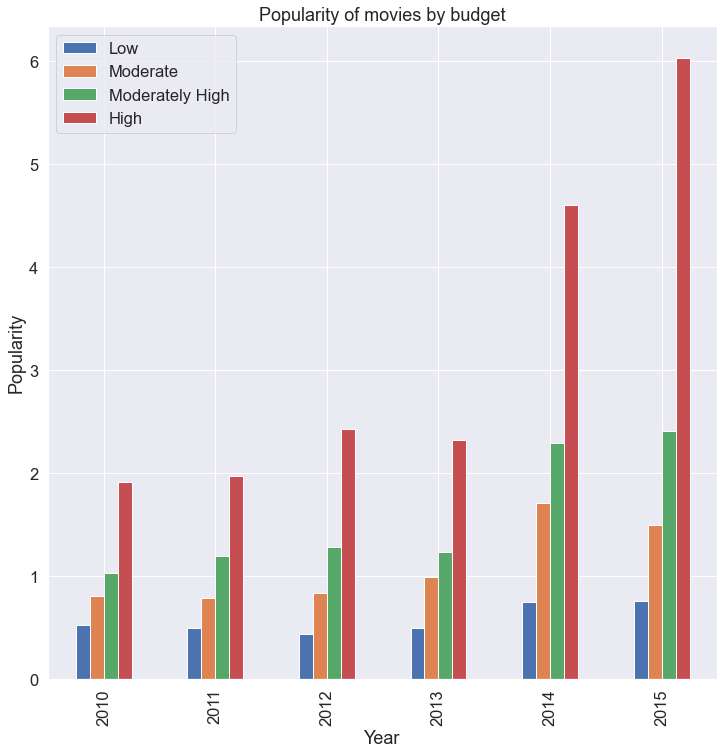

In [86]:
plotdata = pd.DataFrame({
    "Low": short_movie_vote,
    "Moderate": medium_movie_vote,
    "Moderately High": mod_long_movie_vote,
    "High": long_movie_vote
},index=release_years)

plotdata.plot(kind='bar')
plt.title('Popularity of movies by budget')
plt.xlabel("Year")
plt.ylabel("Popularity");

#### Correlation between Budget and Popularity

Based on the graph above, we can comfortable deduce that higher budget movies are more popular than the lower cost ones

### Research Question 4  Top 10 Movies by Profit

We would need to calculate the profit for each movie to get this.

In [87]:
df['profit'] = df['revenue_adj']-df['budget_adj']
df['profit'] = df['profit'].apply(np.int64)
df['budget_adj'] = df['budget_adj'].apply(np.int64)
df['revenue_adj'] = df['revenue_adj'].apply(np.int64)

In [88]:
def top_10(col_name,size=10):
    #find the all times top 10 for a given column
    #sort the given column and select the top 10
    df_sorted = pd.DataFrame(df[col_name].sort_values(ascending=False))[:size]
    df_sorted['original_title'] = df['original_title']
    plt.figure(figsize=(12,6))
    #Calculate the avarage
    avg = np.mean(df[col_name])   
    sns.barplot(x=col_name, y='original_title', data=df_sorted, label=col_name)
    plt.axvline(avg, color='k', linestyle='--', label='mean')
    if (col_name == 'profit' or col_name == 'budget' or col_name == 'revenue'):
        plt.xlabel(col_name.capitalize() + ' (U.S Dolar)')
    else:
        plt.xlabel(col_name.capitalize())
    plt.ylabel('')
    plt.title('Top 10 Movies in: ' + col_name.capitalize())
    plt.legend()

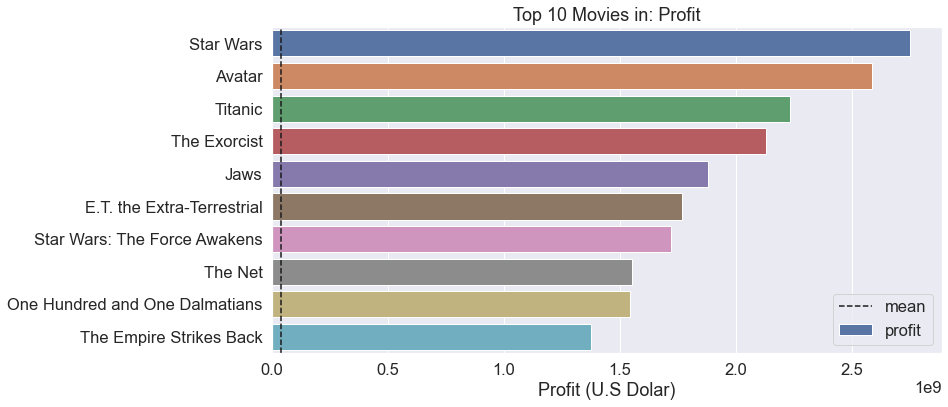

In [89]:
top_10('profit')

As we can see above, Star Wars has the most profit when adjusted for inflation

<a id='conclusions'></a>
## Conclusions


This dataset contains a wealth of knowledge. The dataset has some restrictions, including some features with null or zero values. The rows that correspond to these zero and null values must be eliminated since they impede the analysis. For instance, examining the top cast actors was stalled by the problem of null values. Zero values also produce erroneous results when calculating the pearson correlation and plotting correlations. As a result, data cleaning must be done before the dataset may be investigated. Robert De Niro is one of the well-known actors who has been in numerous movies over the years.

1. Which Genres recieve more favourable ratings
        From our Analysis, we deduced that Animation was the most popular movie genre, followed by Adventure and Fantasy. 
    >Limitations:
        There were some rows who had null values in the genre column so they had to be dropped. There are various genres in every movie. Nevertheless, every movie typically has one core genre and a few smaller ones. For instance, Avatar falls within the Action and Science Fiction categories, according to Google search results. Our analysis, however, revealed that the film also contains Adventure and Fantasy aspects. This classification is therefore ambiguous, and because of this ambiguity, we have classified Avatar as a Adventure, science fiction, action, and Fantasy movie. The same film is counted in each of the four genres.

2. Actors with the most appearances in movies
        As Evident in the bar chart, Robert De Niro has the most appearances with over 70 movie appearances, followeed closely by Samuel L. Jackson. 
        We can also see that there's not much difference between the top actors with the exception of the Top 4.
    >Limitations:
        Some of the rows had the cast missing so also had to be dropped, this made our top actor not inclusive of all movies

3. Correlation between Movie budget and Popularity
        Higher budget movies usually had more popularity as compared to lower budget movies.
    >Limitations:
        50% of the budget and revenue values are both zero. Due to this, only about 50% of the rows could be used for income and budget analysis, and we were unable to provide information for the remaining 50%.

4. Top 10 Movies by Profit (adjusted for inflation)
        We can identify the following movies as the top 10 Movies
        - Star Wars
        - Avatar
        - Titanic
        - The Exorcist
        - Jaws
        - E.T The Extra Terrestial
        - Star Wars: The Force Awakens
        - The Net
        - One Hundred and One Dalmatians
        - The Empire Strikes Back
    >Limitations:
            Although each movie's revenue and budget were known, there was no information on its profit, so I computed it.